<a href="https://colab.research.google.com/github/devroopsaha744/Bank-churn-prediction/blob/main/Kaggle_Playground_Season_04_EP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import binary_crossentropy
from sklearn.metrics import classification_report

In [2]:
train = pd.read_csv("/content/train.csv")

In [3]:
train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2.0,1.0,0.0,181449.97,0.0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2.0,1.0,1.0,49503.50,0.0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2.0,1.0,0.0,184866.69,0.0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1.0,1.0,1.0,84560.88,0.0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2.0,1.0,1.0,15068.83,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126447,126447,15744553,Fiorentini,667,France,Male,34.0,2,0.00,2.0,1.0,1.0,112668.06,0.0
126448,126448,15636562,Muravyova,633,France,Male,35.0,1,0.00,2.0,1.0,1.0,65675.47,0.0
126449,126449,15668830,Lai,648,Germany,Female,22.0,2,139180.97,2.0,1.0,1.0,156774.02,0.0
126450,126450,15597913,Hsiung,762,Germany,Male,20.0,10,122272.57,1.0,0.0,1.0,180598.42,0.0


In [4]:
train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      1
HasCrCard          1
IsActiveMember     1
EstimatedSalary    1
Exited             1
dtype: int64

In [5]:
train = train.dropna()

In [6]:
train.shape

(126451, 14)

In [7]:
train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
train.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited             float64
dtype: object

In [28]:
train['Tenure'].value_counts()

2     13780
7     13660
4     13508
8     13469
5     13196
9     12820
1     12808
3     12698
6     12123
10     4551
0      3838
Name: Tenure, dtype: int64

<Axes: xlabel='EstimatedSalary'>

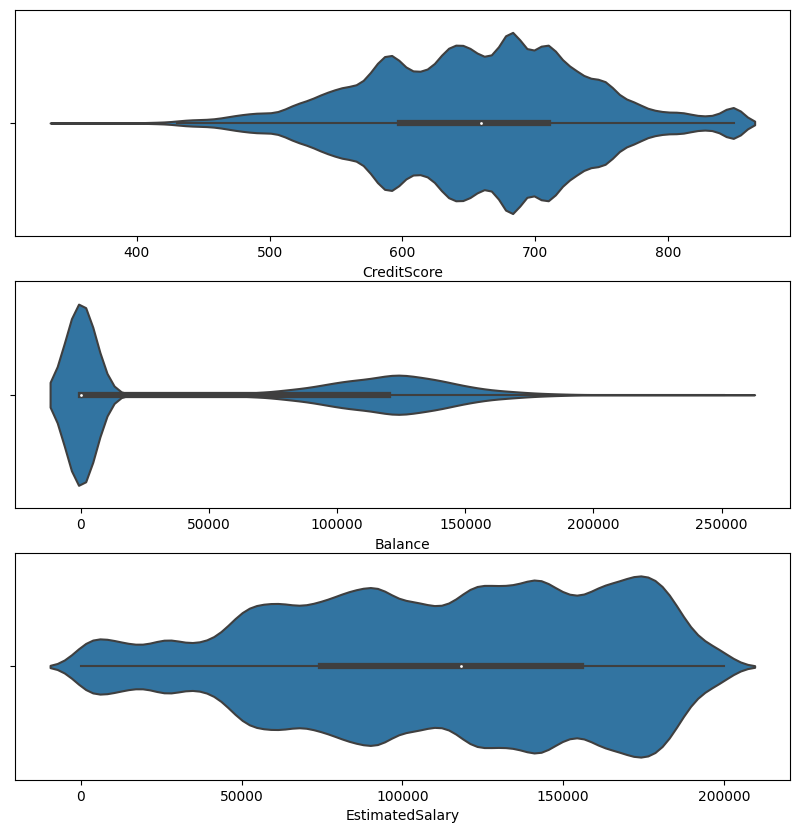

In [29]:
fig, axes = plt.subplots(3,1, figsize = (10,10))
sns.violinplot(x = 'CreditScore', data = train, ax = axes[0])
sns.violinplot(x = 'Balance', data = train, ax = axes[1])
sns.violinplot(x = 'EstimatedSalary', data = train, ax = axes[2])

<Axes: xlabel='EstimatedSalary'>

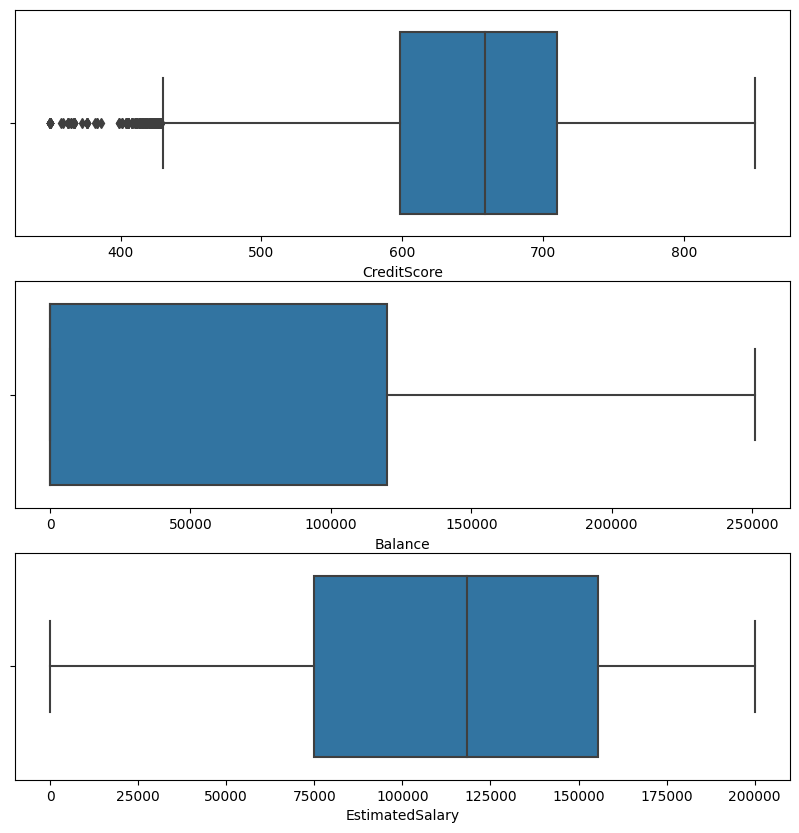

In [30]:
fig, axes = plt.subplots(3,1, figsize = (10,10))
sns.boxplot(x = 'CreditScore', data = train, ax = axes[0])
sns.boxplot(x = 'Balance', data = train, ax = axes[1])
sns.boxplot(x = 'EstimatedSalary', data = train, ax = axes[2])

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

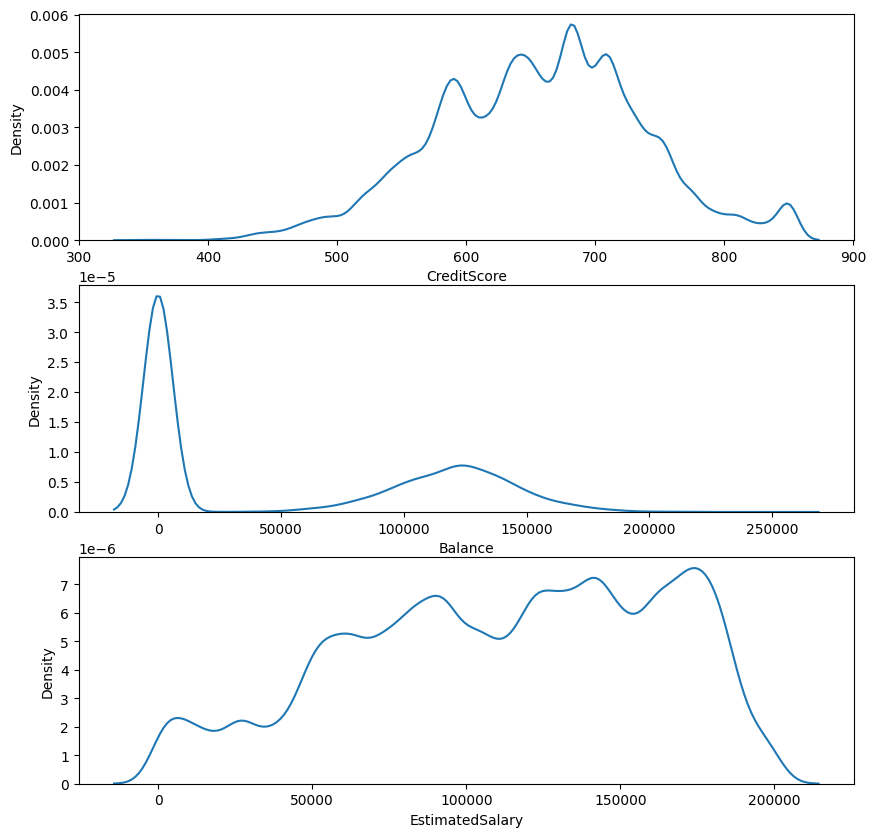

In [37]:
fig, axes = plt.subplots(3,1, figsize = (10,10))
sns.kdeplot(x = 'CreditScore', data = train, ax = axes[0])
sns.kdeplot(x = 'Balance', data = train, ax = axes[1])
sns.kdeplot(x = 'EstimatedSalary', data = train, ax = axes[2])

<Axes: xlabel='EstimatedSalary', ylabel='CreditScore'>

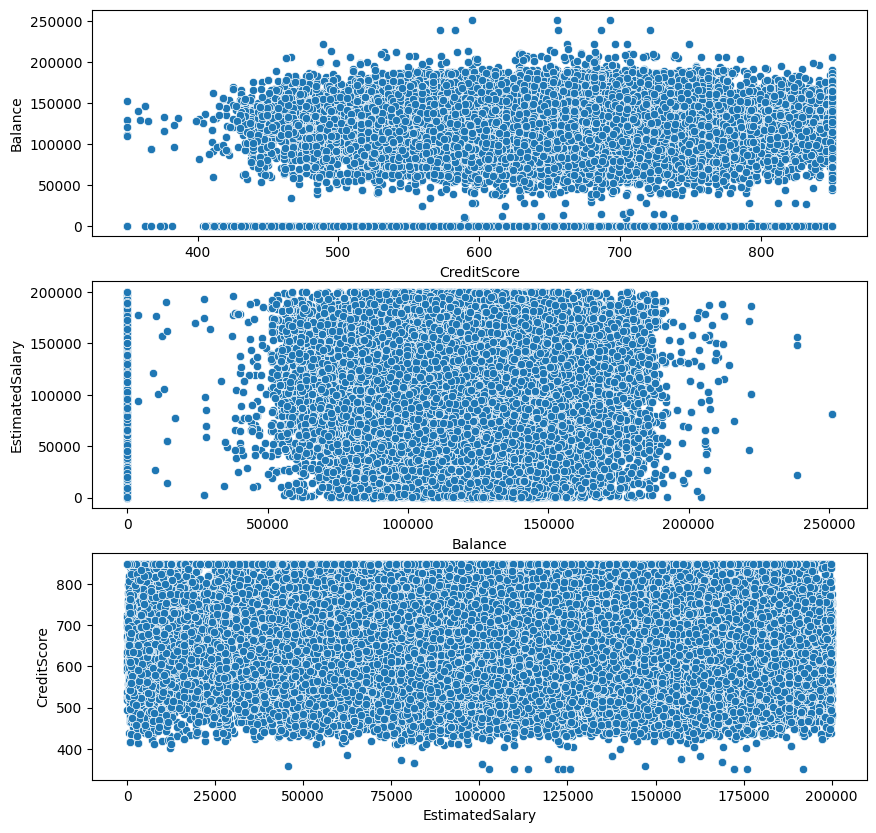

In [32]:
fig, axes = plt.subplots(3,1, figsize = (10,10))
sns.scatterplot(x = 'CreditScore', y = 'Balance' ,data = train, ax = axes[0])
sns.scatterplot(x = 'Balance', y = 'EstimatedSalary', data = train, ax = axes[1])
sns.scatterplot(x = 'EstimatedSalary', y = 'CreditScore', data = train, ax = axes[2])

<Axes: >

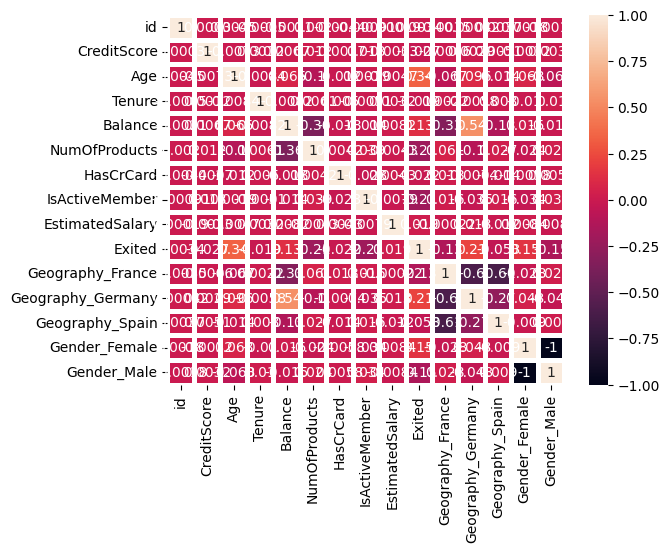

In [36]:
train_corr = train.corr()
sns.heatmap(train_corr, linewidths = 3.5, annot = True)

In [9]:
train = train.drop(['CustomerId'], axis = 1)

## **Exploratory Data Analysis**

In [10]:
train['Surname'].value_counts()

Hsia         1863
T'ien        1765
Hs?          1246
Ts'ui        1210
Maclean      1209
             ... 
Chester         1
Bushell         1
Flannery        1
Bocharova       1
Tyndall         1
Name: Surname, Length: 2727, dtype: int64

In [11]:
train = train.drop(['Surname'], axis = 1)

In [12]:
train['Geography'].value_counts()

France     72312
Spain      27623
Germany    26516
Name: Geography, dtype: int64

In [13]:
pd.crosstab(train['Geography'], train['Exited'])

Exited,0.0,1.0
Geography,,
France,60399,11913
Germany,16413,10103
Spain,22910,4713


In [14]:
train['Exited'].value_counts()

0.0    99722
1.0    26729
Name: Exited, dtype: int64

## **Preprocessing**

In [15]:
train = pd.get_dummies(train)

In [16]:
scl = MinMaxScaler()
scl_train = scl.fit_transform(train)
scl_train = pd.DataFrame(scl_train, columns = train.columns)

In [17]:
x = scl_train.drop(['Exited'], axis = 1)
y = scl_train['Exited']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

## **Model Developement**

In [19]:
#clf1 = LogisticRegression()
#cllf2 = SVC()
#clf3 = KNeighborsClassifier()
#clf4 =  DecisionTreeClassifier()
'''
clf5 = RandomForestClassifier()
clf6 = GradientBoostingClassifier()
clf7 = AdaBoostClassifier()

classifiers = [clf5, clf6, clf7]

for var in classifiers:
  var.fit(x_train, y_train)
  pred = var.predict(x_test)
  print(var.score(x_test, y_test))
'''

'\nclf5 = RandomForestClassifier()\nclf6 = GradientBoostingClassifier()\nclf7 = AdaBoostClassifier()\n\nclassifiers = [clf5, clf6, clf7]\n\nfor var in classifiers:\n  var.fit(x_train, y_train)\n  pred = var.predict(x_test)\n  print(var.score(x_test, y_test))\n'

In [20]:
#Using xgboost
xgb = XGBClassifier(n_estimators = 100)
xgb.fit(x_train, y_train)
xgb.score(x_test,y_test)

0.8611363726226721

In [21]:
y_pred = xgb.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91     19883
         1.0       0.73      0.56      0.63      5408

    accuracy                           0.86     25291
   macro avg       0.81      0.75      0.77     25291
weighted avg       0.85      0.86      0.85     25291



In [22]:
#Building a Neural Network using Keras API of tensorflow
ann = Sequential([
    Dense(units = 32, input_shape = (14,), activation = 'relu'),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid')
])

In [23]:
#ann.summary()

In [24]:
ann.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
#ann.fit(x_train, y_train, epochs = 30, batch_size =  64)

In [26]:
'''eval_res = ann.evaluate(x_test, y_test)
print(f"test loss : {eval_res[0]}")
print(f"test accuracy : {eval_res[1]}")'''

'eval_res = ann.evaluate(x_test, y_test)\nprint(f"test loss : {eval_res[0]}")\nprint(f"test accuracy : {eval_res[1]}")'

In [27]:
#y_pred1 = ann.predict(x_test)